In [28]:
from andromeda.util.common import read_pickle, write_pickle
import pandas as pd
import numpy as np

## Build KMean Cluster

In [29]:
output_name = 'keywords01'

In [30]:
res003 = pd.read_pickle('/Users/aphri/pycharm/data/wv_ticker_mapped_cleaned_new.pkl')
res003.head()

,s,vo,wv,ticker
date,,,,
2018-07-03 18:16:26,centene corporation,reports quarter earnings of per share,"[0.069821596, 0.2268446, -0.1357558, -0.047921...",[CNC]
2014-01-30 13:09:06,nfl,encourage fans shopping to purchase from nfl t...,"[0.07208228, -0.0021257144, 0.2515124, -0.1012...",[NFLX]
2020-11-10 06:07:36,las agencias de turismo se deben reinventar lu...,lets worldwide travel colombia por design,"[0.19914782, 0.078872666, 0.17587417, -0.07582...","[ALK, LVS]"
2019-10-24 23:13:31,oracle blockchain,provide single source of truth for hyperledger...,"[-0.074229, -0.017419994, -0.079432994, -0.071...",[ORCL]
2013-12-02 00:58:41,amazon best selling author callan rush worksho...,fill events,"[-0.17017, 0.029013999, 0.1578735, -0.16875601...",[AMZN]


In [31]:
res003kw = res003[res003.s.str.contains('acq') | res003.vo.str.contains('acq')].copy()
res003kw['factor'] = 'acquisition'

In [32]:
from andromeda.finance.analytics.portfolio import factors_from_cluster
res004kw = factors_from_cluster(res003kw)

In [33]:
res004kw

factor             acquisition
date       ticker             
2009-09-29 ABT               1
2009-10-02 BLL               1
2009-10-03 AJG               1
2009-10-04 IBM               1
2009-10-08 PWR               1
...                        ...
2021-01-08 DUK               1
           PPG               1
2021-01-10 AJG               1
           CTSH              1
2021-01-12 AJG               2

[2455 rows x 1 columns]

count stat for acquisition:
  sum 2455
  mean 1.5797940797940797
  median 1.0


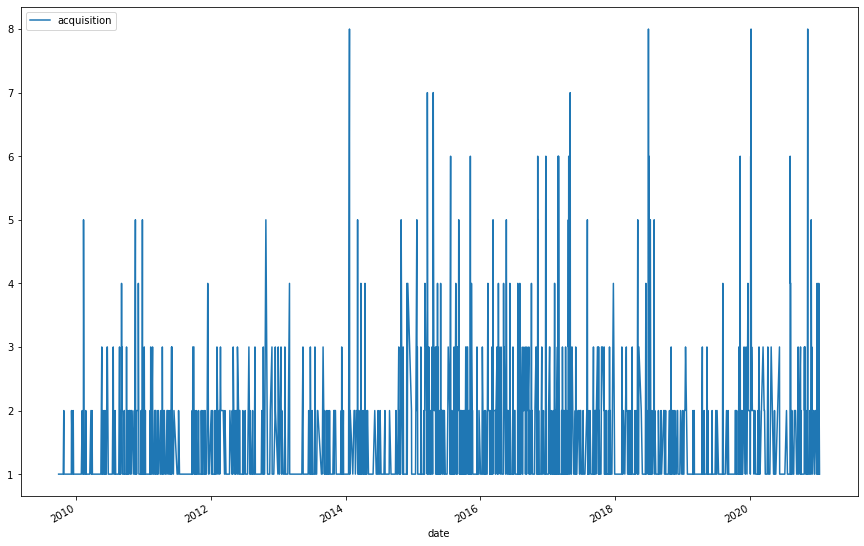

In [34]:
for col in res004kw.columns:
    counts = res004kw[col].groupby('date').count()
    print(f"count stat for {col}:")
    print(f"  sum {counts.sum()}")
    print(f"  mean {counts.mean()}")
    print(f"  median {counts.median()}")
    counts.plot(legend=True, figsize=(15, 10))

## Load SP 500 Returns and GICS

In [35]:
returns = pd.read_pickle('sp500_daily_returns.pkl')

In [36]:
sp500_gics = pd.read_pickle('sp500_gics.pkl')

## Performance Analysis

ANALYZING: acquisition
                Sharpe  Volatility
roll-100     -0.054295    0.172173
equal weight  0.000000    0.178043
roll-2        0.017887    0.188481
roll-None     0.025577    0.169178
roll-8        0.078530    0.191105
roll-13       0.178142    0.182373
roll-10       0.179580    0.186911
roll-5        0.227947    0.193480
roll-15       0.272816    0.180558
sector neutral:
                Sharpe  Volatility
roll-100     -0.060721    0.171498
equal weight  0.000000    0.174855
roll-None     0.101794    0.169096
roll-2        0.128057    0.190428
roll-8        0.238035    0.192191
roll-5        0.280810    0.193997
roll-13       0.296699    0.183881
roll-10       0.340051    0.188037
roll-15       0.371348    0.183113


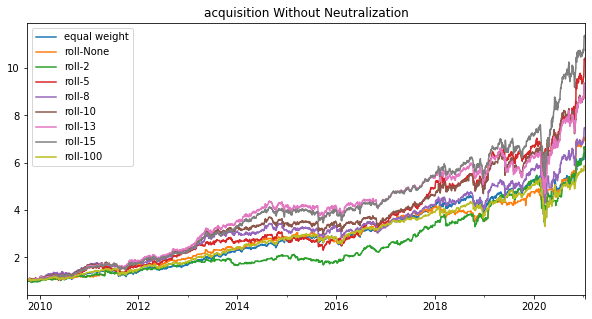

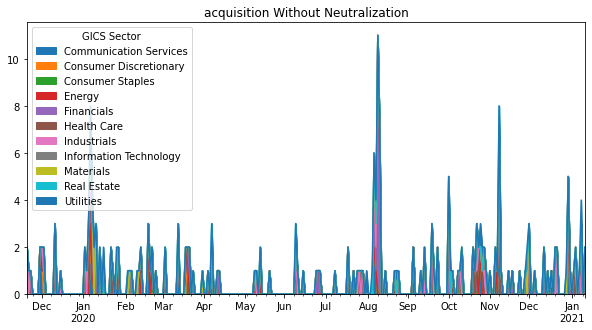

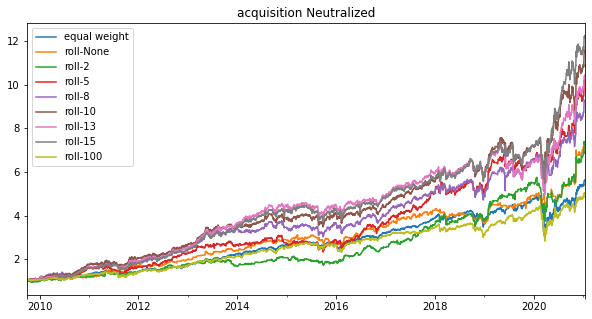

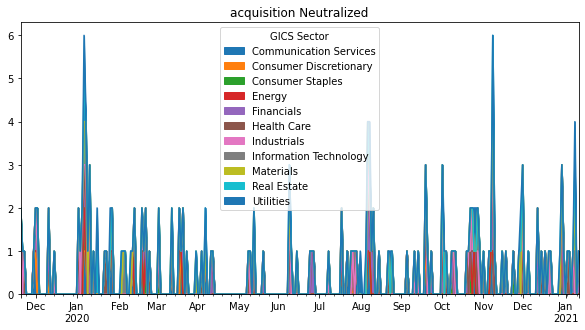

In [37]:
import andromeda.finance.analytics.performance as perf
perf.analyze_factor('acquisition', res004kw, returns, sp500_gics)

In [ ]:
# dropna has cause the strategy performance to change dramatically, and equal weight universe and datetime index to be wrong, need to correct these mistakes
# also since many securities don't have acquistion on a given date, there may be sectors with no acquisition at a time

In [ ]:
# corrected mistakes